In [1]:
import sympy as sp
import numpy as np
from sympy import symbols
sf = sp.SingularityFunction
import matplotlib.pyplot as plt

# kromme ligger voorbeeld 1

In [2]:
l = 4
x = np.linspace(0, l, 552)
dx = (x[1]-x[0])
print(dx)

0.007259528130671506


In [3]:
y = x**2/ 20
#print(y)

In [4]:
dy = []
for i in range(len(y)):
    dy.append(y[i] - y[i-1])

In [5]:
theta = np.arctan(dy/dx)

In [6]:
cos = np.cos(theta)[1:]
sin = np.sin(theta)[1:]

In [7]:
E, I = symbols('E, I')
x = symbols('x')

In [8]:
## Voorbeeld 1: opgelegd op twee steunpunten

Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, theta = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, theta')
# Define F and l
F = 10  ## KN

# Define qz and qx
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = +Ah * sf(x, 0, -1)

In [9]:
# Define V as a function of x
V = sp.sin(theta) * sp.integrate(-qx, x) + sp.cos(theta) * sp.integrate(-qz, x) + Cv
# N definiëren als een functie van x
N = sp.cos(theta) * sp.integrate(-qx, x) + sp.sin(theta) * sp.integrate(qz, x) + Cn

# N definiëren als een functie van x
M = sp.integrate(V, x) / sp.cos(theta) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw


# Display the expressions
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display( N)

'V:'

-Ah*sin(theta)*SingularityFunction(x, 0, 0) + Cv + (Av*SingularityFunction(x, 0, 0) + Bv*SingularityFunction(x, 4, 0) - 10*SingularityFunction(x, 2.0, 0))*cos(theta)

'M:'

Cm + (-Ah*sin(theta)*SingularityFunction(x, 0, 1) + Cv*x + (Av*SingularityFunction(x, 0, 1) + Bv*SingularityFunction(x, 4, 1) - 10*SingularityFunction(x, 2.0, 1))*cos(theta))/cos(theta)

'phi:'

Cm*x + Cphi + (-Ah*sin(theta)*SingularityFunction(x, 0, 2)/2 + Av*cos(theta)*SingularityFunction(x, 0, 2)/2 + Bv*cos(theta)*SingularityFunction(x, 4, 2)/2 + Cv*x**2/2 - 5*cos(theta)*SingularityFunction(x, 2.0, 2))/cos(theta)

'W:'

-Cm*x**2/2 - Cphi*x + Cw - (-Ah*sin(theta)*SingularityFunction(x, 0, 3)/6 + Av*cos(theta)*SingularityFunction(x, 0, 3)/6 + Bv*cos(theta)*SingularityFunction(x, 4, 3)/6 + Cv*x**3/6 - 5*cos(theta)*SingularityFunction(x, 2.0, 3)/3)/cos(theta)

-Ah*cos(theta)*SingularityFunction(x, 0, 0) + Cn + (-Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, 4, 0) + 10*SingularityFunction(x, 2.0, 0))*sin(theta)

In [10]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)
eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+1)
equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn))

In [11]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: -10.0000000000000, Cw: 0.0, Av: 5.00000000000000, Bv: 5.00000000000000, Ah: 0.0, Cn: 0.0}


In [12]:
Cv= 0.0
Cm= 0.0
Cphi= -10
Cw= 0.0, 
Av= 5.00000000000000
Bv= 5.00000000000000
Ah= 0.0
Cn= 0.0

In [13]:
display(V)

-Ah*sin(theta)*SingularityFunction(x, 0, 0) + Cv + (Av*SingularityFunction(x, 0, 0) + Bv*SingularityFunction(x, 4, 0) - 10*SingularityFunction(x, 2.0, 0))*cos(theta)

In [14]:
x_val = np.linspace(0, l, 550)
V_list = []
for i in range(len(x_val)):
    V_list.append((Av*sf(x_val[i], 0, 0)+ Bv*sf(x_val[i], 4, 0) - 10*sf(x_val[i], 2, 0)) * cos[i])

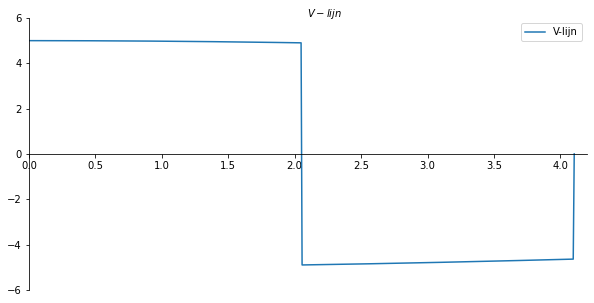

In [15]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-6, 6)
ax.set_xlim(0, 4.2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[316], np.array(V_list), label='V-lijn')
ax.legend();
x_val[-1]/cos[316] #De lengte van de kromme ligger. 
plt.savefig('V_par_lijnvoorbeeld1', dpi=450);

In [16]:
display(N)

-Ah*cos(theta)*SingularityFunction(x, 0, 0) + Cn + (-Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, 4, 0) + 10*SingularityFunction(x, 2.0, 0))*sin(theta)

In [17]:
x_val = np.linspace(0, l, 550)
N_list = []
for i in range(len(x_val)):
    N_list.append((-Av*sf(x_val[i], 0,0) -Bv*sf(x_val[i],4,0)+ 10*sf(x_val[i], 2, 0)) * sin[i])
#print(N_list)

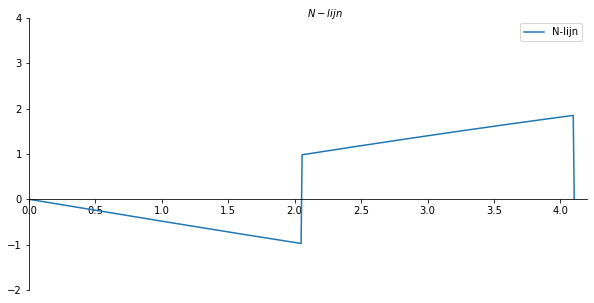

In [18]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-2, 4)
ax.set_xlim(0, 4.2)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[316], np.array(N_list), label='N-lijn')
ax.legend()
plt.savefig('N_par_lijnvoorbeeld1', dpi=450);

In [19]:
x_val = np.linspace(0, 4, 550)
M_list = []
for i in x_val:
    M_list.append((Av * sf(i, 0, 1) - F * sf(i, l/2, 1) + Bv * sf(i, l, 1)))
#display(M)

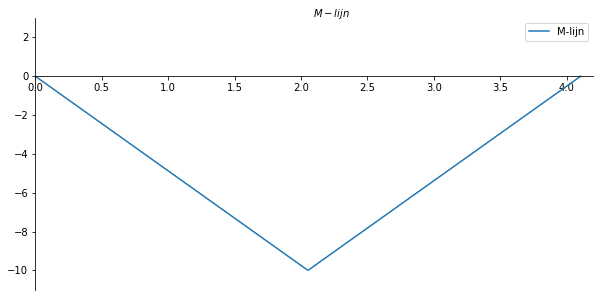

In [20]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.2)
ax.set_ylim(-11, 3)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[316], -np.array(M_list) , label='M-lijn')
ax.legend()
plt.savefig('M_par_lijnvoorbeeld1', dpi=450);

In [21]:
x_val = np.linspace(0, l, 550)
phi_list = []
for i in x_val:
    phi_list.append((Av/2) * sf(i, 0, 2) - (F/2) * sf(i, l/2, 2) + (Bv/2) * sf(i, l, 2) + Cphi)

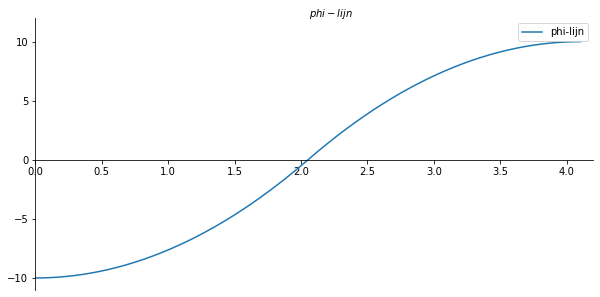

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.2)
ax.set_ylim(-11, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[316], np.array(phi_list), label='phi-lijn')
ax.legend()
plt.savefig('phi_par_lijnvoorbeeld1', dpi=450);

In [23]:
x_val = np.linspace(0, l, 550)
W_list = []
for i in x_val:
    W_list.append((-Av/6) * sf(i, 0, 3) + (F/6) * sf(i, l/2, 3) + (Bv/6) * sf(i, l, 3) - Cphi*i)

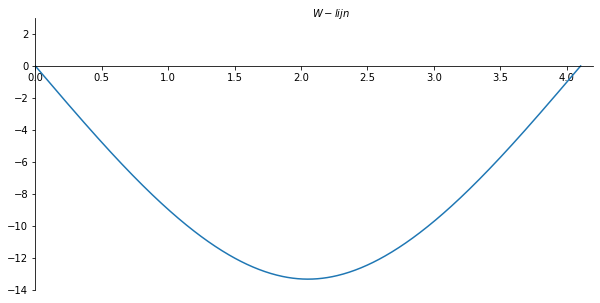

In [24]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 4.2)
ax.set_ylim(-14, 3)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$W-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[316], - np.array(W_list), label='W-lijn')
plt.savefig('W_par_lijnvoorbeeld1', dpi=450);

# Kromme ligger voorbeeld 2

In [25]:
l = 4
x = np.linspace(0, l, 552)
dx = (x[1]-x[0])
print(dx)

0.007259528130671506


In [26]:
y = x**2/ 4
#print(y)

In [27]:
dy = []
for i in range(len(y)):
    dy.append(y[i] - y[i-1])

In [28]:
theta = np.arctan(dy/dx)

In [29]:
cos = np.cos(theta)[1:]
sin = np.sin(theta)[1:]

In [30]:
E, I = symbols('E, I')
x = symbols('x')

In [31]:
## Voorbeeld 1: opgelegd op twee steunpunten

Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, theta = sp.symbols('Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn, theta')
# Define F and l
F = 10  ## KN

# Define qz and qx
qz = -Av * sf(x, 0, -1) + F * sf(x, l/2, -1) - Bv * sf(x, l, -1)
qx = +Ah * sf(x, 0, -1)

In [32]:
# Define V as a function of x
V = sp.sin(theta) * sp.integrate(-qx, x) + sp.cos(theta) * sp.integrate(-qz, x) + Cv
# N definiëren als een functie van x
N = sp.cos(theta) * sp.integrate(-qx, x) + sp.sin(theta) * sp.integrate(qz, x) + Cn

# N definiëren als een functie van x
M = sp.integrate(V, x) / sp.cos(theta) + Cm

# Define phi as an integral of M
phi = sp.integrate(M, x) + Cphi

# Define W as an integral of -phi
W = sp.integrate(-phi, x) + Cw


# Display the expressions
display("V:", V)
display("M:", M)
display("phi:", phi)
display("W:", W)
display( N)

'V:'

-Ah*sin(theta)*SingularityFunction(x, 0, 0) + Cv + (Av*SingularityFunction(x, 0, 0) + Bv*SingularityFunction(x, 4, 0) - 10*SingularityFunction(x, 2.0, 0))*cos(theta)

'M:'

Cm + (-Ah*sin(theta)*SingularityFunction(x, 0, 1) + Cv*x + (Av*SingularityFunction(x, 0, 1) + Bv*SingularityFunction(x, 4, 1) - 10*SingularityFunction(x, 2.0, 1))*cos(theta))/cos(theta)

'phi:'

Cm*x + Cphi + (-Ah*sin(theta)*SingularityFunction(x, 0, 2)/2 + Av*cos(theta)*SingularityFunction(x, 0, 2)/2 + Bv*cos(theta)*SingularityFunction(x, 4, 2)/2 + Cv*x**2/2 - 5*cos(theta)*SingularityFunction(x, 2.0, 2))/cos(theta)

'W:'

-Cm*x**2/2 - Cphi*x + Cw - (-Ah*sin(theta)*SingularityFunction(x, 0, 3)/6 + Av*cos(theta)*SingularityFunction(x, 0, 3)/6 + Bv*cos(theta)*SingularityFunction(x, 4, 3)/6 + Cv*x**3/6 - 5*cos(theta)*SingularityFunction(x, 2.0, 3)/3)/cos(theta)

-Ah*cos(theta)*SingularityFunction(x, 0, 0) + Cn + (-Av*SingularityFunction(x, 0, 0) - Bv*SingularityFunction(x, 4, 0) + 10*SingularityFunction(x, 2.0, 0))*sin(theta)

In [33]:
eq1 = V.subs(x, -1)
eq2 = V.subs(x, l+1) 

eq3 = M.subs(x, 0)
eq4 = M.subs(x, l)

eq5 = W.subs(x, l)
eq6 = W.subs(x, 0)
eq7 = N.subs(x, -1)
eq8 = N.subs(x, l+1)
equations = [eq1 -0, eq2-0,eq3-0,eq4-0,eq5-0,eq6-0, eq7-0, eq8 -0]
solutions = sp.solve(equations, (Cv, Cm, Cphi, Cw, Av, Bv, Ah, Cn))

In [34]:
print(solutions)

{Cv: 0.0, Cm: 0.0, Cphi: -10.0000000000000, Cw: 0.0, Av: 5.00000000000000, Bv: 5.00000000000000, Ah: 0.0, Cn: 0.0}


In [35]:
Cv= 0.0
Cm= 0.0
Cphi= -10
Cw= 0.0, 
Av= 5.00000000000000
Bv= 5.00000000000000
Ah= 0.0
Cn= 0.0

In [36]:
x_val = np.linspace(0, l, 550)
V_list = []
for i in range(len(x_val)):
    V_list.append((Av*sf(x_val[i], 0, 0)+ Bv*sf(x_val[i], 4, 0) - 10*sf(x_val[i], 2, 0)) * cos[i])
#print(V_list)

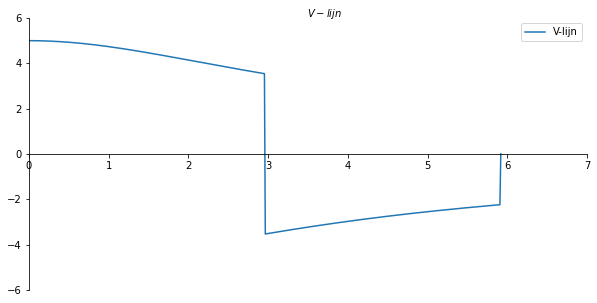

In [37]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-6, 6)
ax.set_xlim(0, 7)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$V-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[300], np.array(V_list), label='V-lijn')
ax.legend();
x_val[-1]/cos[300] #De lengte van de kromme ligger. 
plt.savefig('V_par_lijnvoorbeeld2', dpi=450);

In [38]:
x_val = np.linspace(0, l, 550)
N_list = []
for i in range(len(x_val)):
    N_list.append((-Av*sf(x_val[i], 0,0) -Bv*sf(x_val[i],4,0)+ 10*sf(x_val[i], 2, 0)) * sin[i])
# print(N_list)

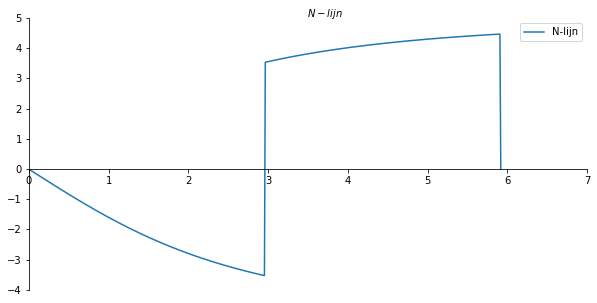

In [39]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(-4, 5)
ax.set_xlim(0, 7)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$N-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[300], np.array(N_list), label='N-lijn')
ax.legend()
plt.savefig('N_par_lijnvoorbeeld2', dpi=450);

In [40]:
x_val = np.linspace(0, 4, 550)
M_list = []
for i in x_val:
    M_list.append((Av * sf(i, 0, 1) - F * sf(i, l/2, 1) + Bv * sf(i, l, 1)))
#display(M)

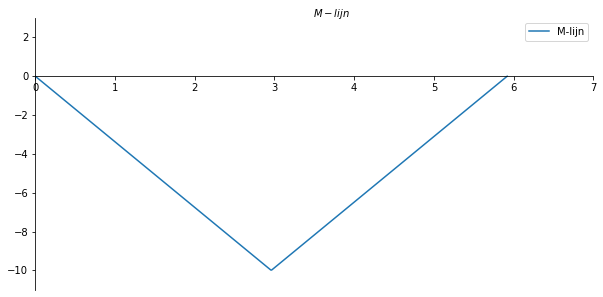

In [41]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 7)
ax.set_ylim(-11, 3)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$M-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[300], -np.array(M_list) , label='M-lijn')
ax.legend()
plt.savefig('M_par_lijnvoorbeeld2', dpi=450);

In [42]:
x_val = np.linspace(0, l, 550)
phi_list = []
for i in x_val:
    phi_list.append((Av/2) * sf(i, 0, 2) - (F/2) * sf(i, l/2, 2) + (Bv/2) * sf(i, l, 2) + Cphi)

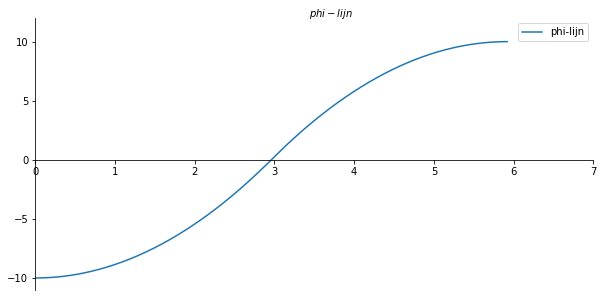

In [43]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 7)
ax.set_ylim(-11, 12)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$phi-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[300], np.array(phi_list), label='phi-lijn')
ax.legend()
plt.savefig('phi_par_lijnvoorbeeld2', dpi=450);

In [44]:
x_val = np.linspace(0, l, 550)
W_list = []
for i in x_val:
    W_list.append((-Av/6) * sf(i, 0, 3) + (F/6) * sf(i, l/2, 3) + (Bv/6) * sf(i, l, 3) - Cphi*i)

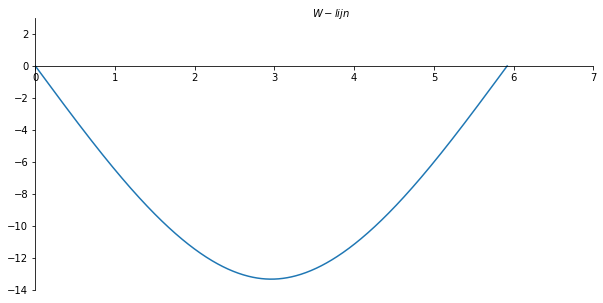

In [45]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlim(0, 7)
ax.set_ylim(-14, 3)

ax.spines["left"].set_position("zero")
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_position("zero")
ax.spines["top"].set_visible(False)


ax.set_xlabel("$W-lijn$")
ax.xaxis.set_label_coords(0.53, 1.04)
plt.gca()
ax.plot(x_val/cos[300], - np.array(W_list), label='W-lijn')
plt.savefig('W_par_lijnvoorbeeld2', dpi=450);

# Waarden in MatrixFrame

In [46]:
x = np.linspace(0, 4, 21)
print(x)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4. ]


In [47]:
y = x**2/20
y1 = x**2/ 4

In [48]:
print(y)

[0.    0.002 0.008 0.018 0.032 0.05  0.072 0.098 0.128 0.162 0.2   0.242
 0.288 0.338 0.392 0.45  0.512 0.578 0.648 0.722 0.8  ]


In [49]:
print(y1)

[0.   0.01 0.04 0.09 0.16 0.25 0.36 0.49 0.64 0.81 1.   1.21 1.44 1.69
 1.96 2.25 2.56 2.89 3.24 3.61 4.  ]


0.007259528130671506
